### Zadanie 1

## Generator ACORN (Additive Congruential Random Number) k-tego rzędu

Generator ACORN k-tego rzędu oparty jest na ciągach liczbowych zdefiniowanych poprzez równania rekurencyjne:

\begin{equation}
X_n^0 = X_0^0, \quad n \geq 1
\end{equation}

\begin{equation}
X_n^m = (X_{n-1}^m + X_n^{m-1}) \mod M, \quad m = 1, \ldots, k, \quad n \geq 1
\end{equation}

\begin{equation}
Y_n^k = \frac{X_n^k}{M}, \quad n \geq 1
\end{equation}

Jeśli ziarno $X_0^0 \in \{1, \ldots, M-1\}$ jest względnie pierwsze z $M$ i $M$ jest dostatecznie duże, to ciąg $Y_n^k$ dla $n \geq 1$ przypomina ciąg IID z rozkładu jednostajnego $U(0, 1)$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.typing import NDArray

In [4]:
def ACORN(N: int, k: int, M: int, Lag: int) -> NDArray:
    '''
    Generator zmiennych losowych z rozkładu jednostajnego.

    Parametry:
    N: liczba generowanych zmiennych
    k: rząd 
    M: dzielnik
    Lag: pominięcie Lag pierwszych wyrazów

    Zwraca:
    Wektor zmiennych losowych.
    '''
    X = np.zeros((k + 1, N + Lag), dtype=object)
    X[0, 0] = 487
    for n in range(1, N + Lag):
        X[0, n] = X[0, n - 1]
        for m in range(1, k + 1):
            X[m, n] = (X[m - 1, n] + X[m, n - 1]) % M
    Y = X[k, Lag:] / M
    return Y

In [5]:
N = 1000
k = 13
M = 2**89 - 1
Lag = 10**3

Y_ACORN = ACORN(N, k, M, Lag)
Y_numpy = np.random.uniform(0, 1, N)

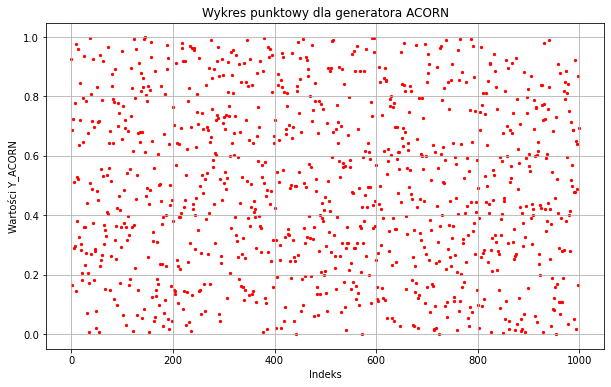

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(range(N), Y_ACORN, color="r", s=5)
plt.title("Wykres punktowy dla generatora ACORN")
plt.xlabel("Indeks")
plt.ylabel("Wartości Y_ACORN")
plt.grid()
plt.show()


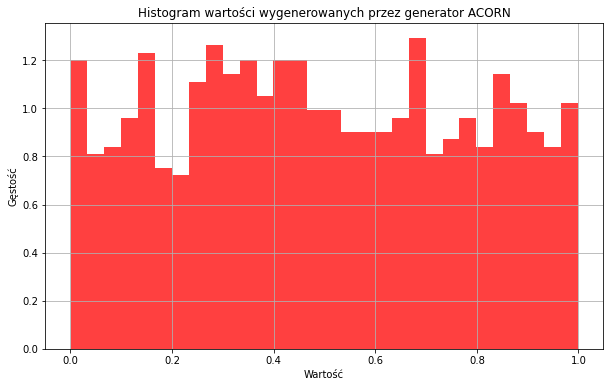

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(Y_ACORN, bins=30, color="r", alpha=0.75, density=True)
plt.title("Histogram wartości wygenerowanych przez generator ACORN")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")
plt.grid()
plt.show()

In [10]:
acorn_times = []
numpy_times = []
n = np.arange(0, 100000, 1000)

for i in n:
    start = time.time()
    ACORN(i, k, M, Lag)
    end = time.time()
    acorn_times.append(end - start)

for i in n:
    start = time.time()
    np.random.uniform(0, 1, i)
    end = time.time()
    numpy_times.append(end - start)


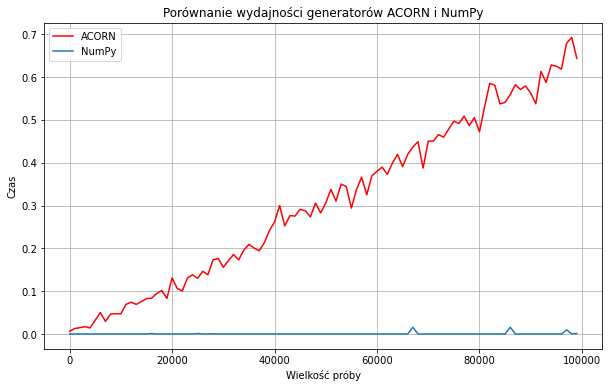

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(n, acorn_times, color="r", label="ACORN")
plt.plot(n, numpy_times, label="NumPy")
plt.title("Porównanie wydajności generatorów ACORN i NumPy")
plt.xlabel("Wielkość próby")
plt.ylabel("Czas")
plt.legend()
plt.grid()
plt.show()